In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import ast

pd.options.display.max_columns = 50

# Wine

In [1038]:
wine = pd.read_csv('..//data_collecting//wine_07012023.csv')

## Dados Faltantes

<AxesSubplot: >

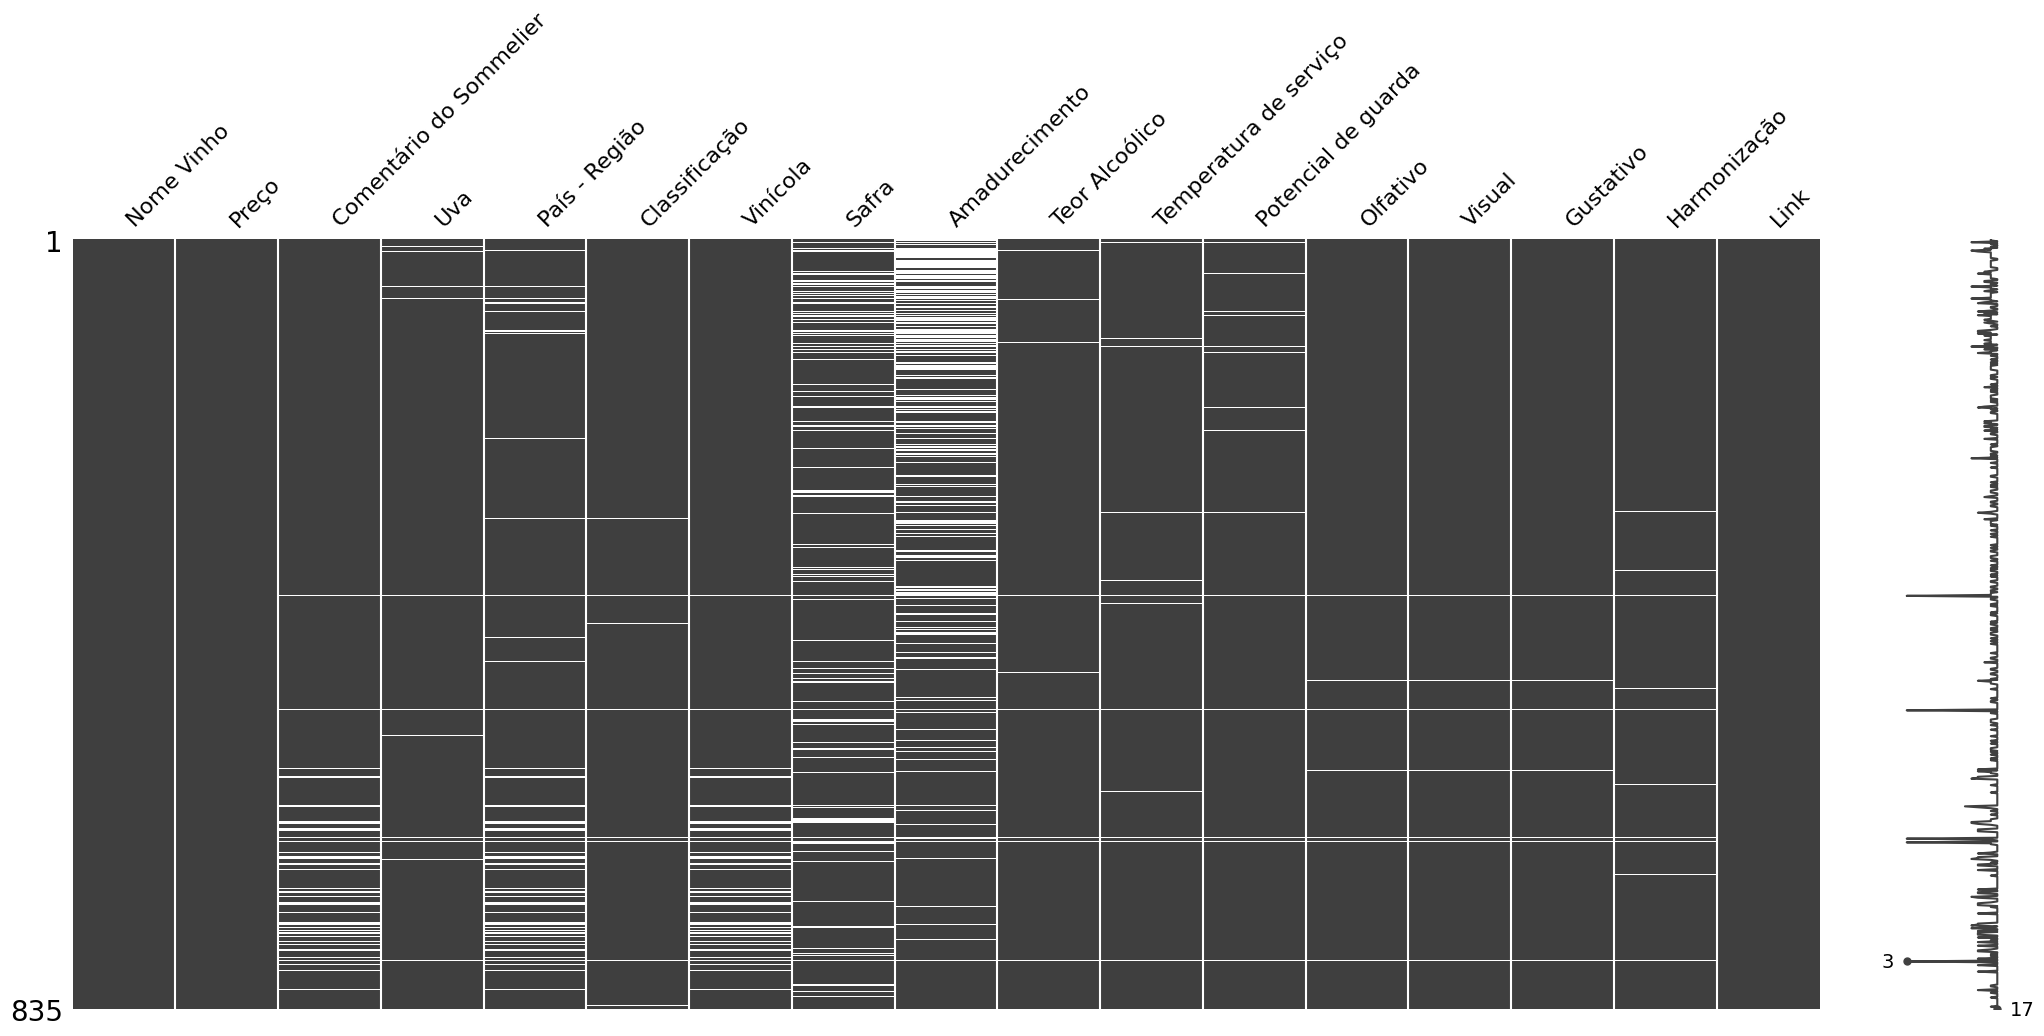

In [1039]:
msno.matrix(wine)

In [1040]:
wine.sample(5)

,Nome Vinho,Preço,Comentário do Sommelier,Uva,País - Região,Classificação,Vinícola,Safra,Amadurecimento,Teor Alcoólico,Temperatura de serviço,Potencial de guarda,Olfativo,Visual,Gustativo,Harmonização,Link
733,Pinhal da Torre Properties Blend D.O.C do Tejo...,282.24,"Localizada no coração de Portugal, O Tejo é um...","Touriga Franca (55%), Syrah (40%), Touriga Nac...",Portugal - Tejo,Seco,Pinhal da Torre,2020.0,8 meses em barricas de carvalho francês,14.00% ABV,16 °C,12 anos,"Aromas de frutas negras, alcaçuz e notas tostadas",Rubi com reflexos violáceos,Apresenta uma ótima estrutura com taninos firm...,"Entrevero de pinhão, costela gaúcha com crosta...",https://www.wine.com.br/vinhos/pinhal-da-torre...
582,Kit 4 - Tintos Várias Uvas,150.12,NaN,Tannat,NaN,Meio Seco,NaN,2021.0,Em tanques de aço inox,12.50% ABV,16 °C,3 anos,"Intensos aromas de frutas vermelhas, frutas ve...",Vermelho intenso,"Um vinho jovem, corpo médio, frutado, com tani...","Opte por pratos de média estrutura, carnes ver...",https://www.wine.com.br/vinhos/bundle/kit-4-ti...
684,Cuna del Sol Unique Blend 2017,235.18,Um blend que se destaca pela complexidade e ha...,"Cabernet Sauvignon (45.00%), Carménère (35.00%...",Chile - Valle de Colchagua,Seco,Viña Siegel,2017.0,Mínimo de 14 meses em barricas de carvalho fra...,14.50% ABV,17 °C,8 anos,"Aroma de cassis, ameixas, especiarias e violeta",Púrpura,"Macio, encorpado e final persistente","Bruschetta de cogumelos e parmesão, maminha as...",https://www.wine.com.br/vinhos/cuna-del-sol-un...
68,Pedro Teixeira Rosé,41.06,"Elaborado com Baga, uma das castas mais difíce...",Baga (100%),NaN,Meio Seco,Adega de Cantanhede,NaN,Mínimo de 2 meses em garrafa.,11.50% ABV,8 °C,1 ano,Frutos vermelhos frescos com predominância de ...,Rosa cristalino,"Frutado, fresco, elegante e harmonioso.","Comida condimentada, como culinária mexicana, ...",https://www.wine.com.br/vinhos/pedro-teixeira-...
630,espumante-henri-maire-a-o-c-cremant-du-jura-brut,188.12,"Espumante com aromas floral, frutas brancas ma...","Chardonnay, Pinot Noir",França - Jura,Brut,Domaines Henri Maire,NaN,Mínimo de 12 meses sobre em contato com as bor...,12.00% ABV,7 °C,3 anos,"Floral, frutas brancas maduras como pera e not...",Amarelo claro e brilhante.,"Saboroso, elegante, leve e com delicioso frescor.","Carpaccio de polvo com pimenta-rosa, nozes e a...",https://www.wine.com.br/vinhos/espumante-henri...


In [1041]:
wine.shape

(835, 17)

In [1042]:
wine.isnull().sum()

Nome Vinho                   0
Preço                        0
Comentário do Sommelier     50
Uva                         12
País - Região               64
Classificação                9
Vinícola                    50
Safra                      111
Amadurecimento             190
Teor Alcoólico               9
Temperatura de serviço      12
Potencial de guarda         15
Olfativo                     7
Visual                       7
Gustativo                    7
Harmonização                10
Link                         0
dtype: int64

In [1043]:
wine.loc[~(wine['Nome Vinho'].str.contains('Kit|kit'))]

,Nome Vinho,Preço,Comentário do Sommelier,Uva,País - Região,Classificação,Vinícola,Safra,Amadurecimento,Teor Alcoólico,Temperatura de serviço,Potencial de guarda,Olfativo,Visual,Gustativo,Harmonização,Link
0,Arya Tinto 2021 Lata 269 mL,23.41,O Arya acaba de vez com qualquer preconceito q...,"Merlot, Pinot Noir, Cabernet Franc e Cabernet ...",Brasil - Serra Gaúcha,Seco,Arya Wines,2021.0,NaN,12.50% ABV,15 °C,3 anos,"Frutado, sobretudo frutas vermelhas, ameixas e...",Rubi,"Corpo leve para médio, frutado, com frescor e ...","Embutidos, massas ao molho vermelho, risotos d...",https://www.wine.com.br/vinhos/arya-tinto-2021...
1,Arya Rosé 2021 Lata 269 mL,23.41,Um rosé produzido com uvas da Serra Gaúcha e d...,"Pinot Noir, Merlot, Trebbiano",Brasil - Serra Gaúcha,Seco,Arya Wines,2021.0,NaN,11.00% ABV,8 °C,3 anos,"Frutas vermelhas, especialmente morangos madur...",Rosa cereja pálido,"Fresco e delicado, suculento e frutado, cremos...","Versátil, funcionando com aperitivos e entrada...",https://www.wine.com.br/vinhos/arya-rose-2021-...
2,Paine Cabernet Sauvignon 2021 375 mL,32.82,"Essencialmente frutado e leve, este vinho foi ...",Cabernet Sauvignon,Chile - Valle Central,Seco,VyF Wines,2021.0,Breve passagem em tanques de aço inox,13.00% ABV,16 °C,3 anos,"Aromas de frutas negras e vermelhas, pimenta-d...",Rubi,"Um vinho jovem, leve, frutado com sutis notas ...","Opte por pratos mais leves, carnes magras, mol...",https://www.wine.com.br/vinhos/paine-cabernet-...
3,Já Pias 375 mL,32.82,Este rótulo é uma verdadeira raridade para os ...,Uvas nativas,Portugal - Não especificada,Meio Seco,Parras Wine,NaN,NaN,13.50% ABV,NaN,NaN,"Frutas vermelhas maduras, ameixa",Rubi intenso,"Taninos aveludados, boa acidez, final longo","Cozinha mediterrânea, queijos semi-duros, trig...",https://www.wine.com.br/vinhos/ja-pias-375-ml/...
4,Viña Carrasco D.O. Valle Central Rosé 2021,38.71,A Cabernet Sauvignon e Merlot são as uvas pres...,"Cabernet Sauvignon, Merlot",Chile - Valle Central,Seco,Luis Felipe Edwards,2021.0,Em tanques de aço inox,12.00% ABV,9 °C,3 anos,"Intensos aromas de frutas vermelhas frescas, m...",Rosa-claro,"Jovem, leve, frutado, acidez agradável e refre...","Espaguete com camarão, risoto de palmito com r...",https://www.wine.com.br/vinhos/vina-carrasco-d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,Château Palmer 2005,16881.18,"O primeiro vinho do Château Palmer, que produz...","Petit Verdot (7.00%), Cabernet Sauvignon (53.0...",França - Margaux,Seco,Château Palmer,2005.0,Em barricas de carvalho.,14.00% ABV,16 °C,50 anos,"Cereja negra, mirtilo, cassis, ameixa, alcaçuz...",Rubi intenso,"Concentrado, elegante, potente, taninos presen...","Picanha de cordeiro, cogumelos recheados com b...",https://www.wine.com.br/vinhos/chateau-palmer-...
831,Château Angelus 2015,18351.76,2015 foi uma safra excepcional em Saint-Émilio...,"Merlot (62.00%), Cabernet Franc (38.00%)",França - Saint-Émilion,NaN,Château Angélus,2015.0,Em barricas de carvalho.,15.00% ABV,16 °C,30 anos,"Mirtilo, ameixa seca, framboesa, especiarias, ...",Rubi intenso,"Potente, taninos presentes, boa acidez, final ...","Marreco ao molho de ameixas, carré de javali e...",https://www.wine.com.br/vinhos/chateau-angelus...
832,Chateau Latour 2011,19822.35,"O grande vinho do Château Latour, nome que já ...","Cabernet Sauvignon (84.50%), Merlot (15.00%), ...",França - Pauillac,Seco,Château Latour,2011.0,18 meses em barricas de carvalho.,13.00% ABV,16 °C,25 anos,"Frutas maduras, especiarias, tabaco, floral",Rubi intenso,"Muito complexo, corpo de médio para encorpado,...","Paleta de cordeiro, bife ancho, cogumelos rech...",https://www.wine.com.br/vinhos/chateau-latour-...
833,Château Margaux 2014,21469.41,Esse pontuado exemplar é um Premier Grand Cru ...,"Cabernet Sauvignon (90.00%), Merlot (5.00%), C...",França - Margaux,Seco,Château Margaux,2014.0,24 meses em barricas de carvalho.,13.00% ABV,16 °C,23 anos,"Ameixa, figo em compota, groselha madura, anis...",Rubi 

In [1044]:
# Carcaterísticas que são muito importantes e sem elas drop:

# valores com 14 colunas nulas nem vale o esforço

wine = wine.dropna(thresh=14)

# Queremos apenas características individuais, então retiro kits

wine = wine.loc[~(wine['Nome Vinho'].str.contains('Kit|kit'))]

# Uva

wine = wine.loc[wine['Uva'].notna()==True]

# País - Região

wine = wine.loc[wine['País - Região'].notna()==True]

# Classificação ( Tipo )

wine = wine.loc[wine['Classificação'].notna()==True]

# Outras características:

wine = wine.dropna(subset=['Teor Alcoólico', 'Temperatura de serviço', 'Potencial de guarda','Olfativo', 'Visual', 'Gustativo', 'Harmonização', 'Link'])


<AxesSubplot: >

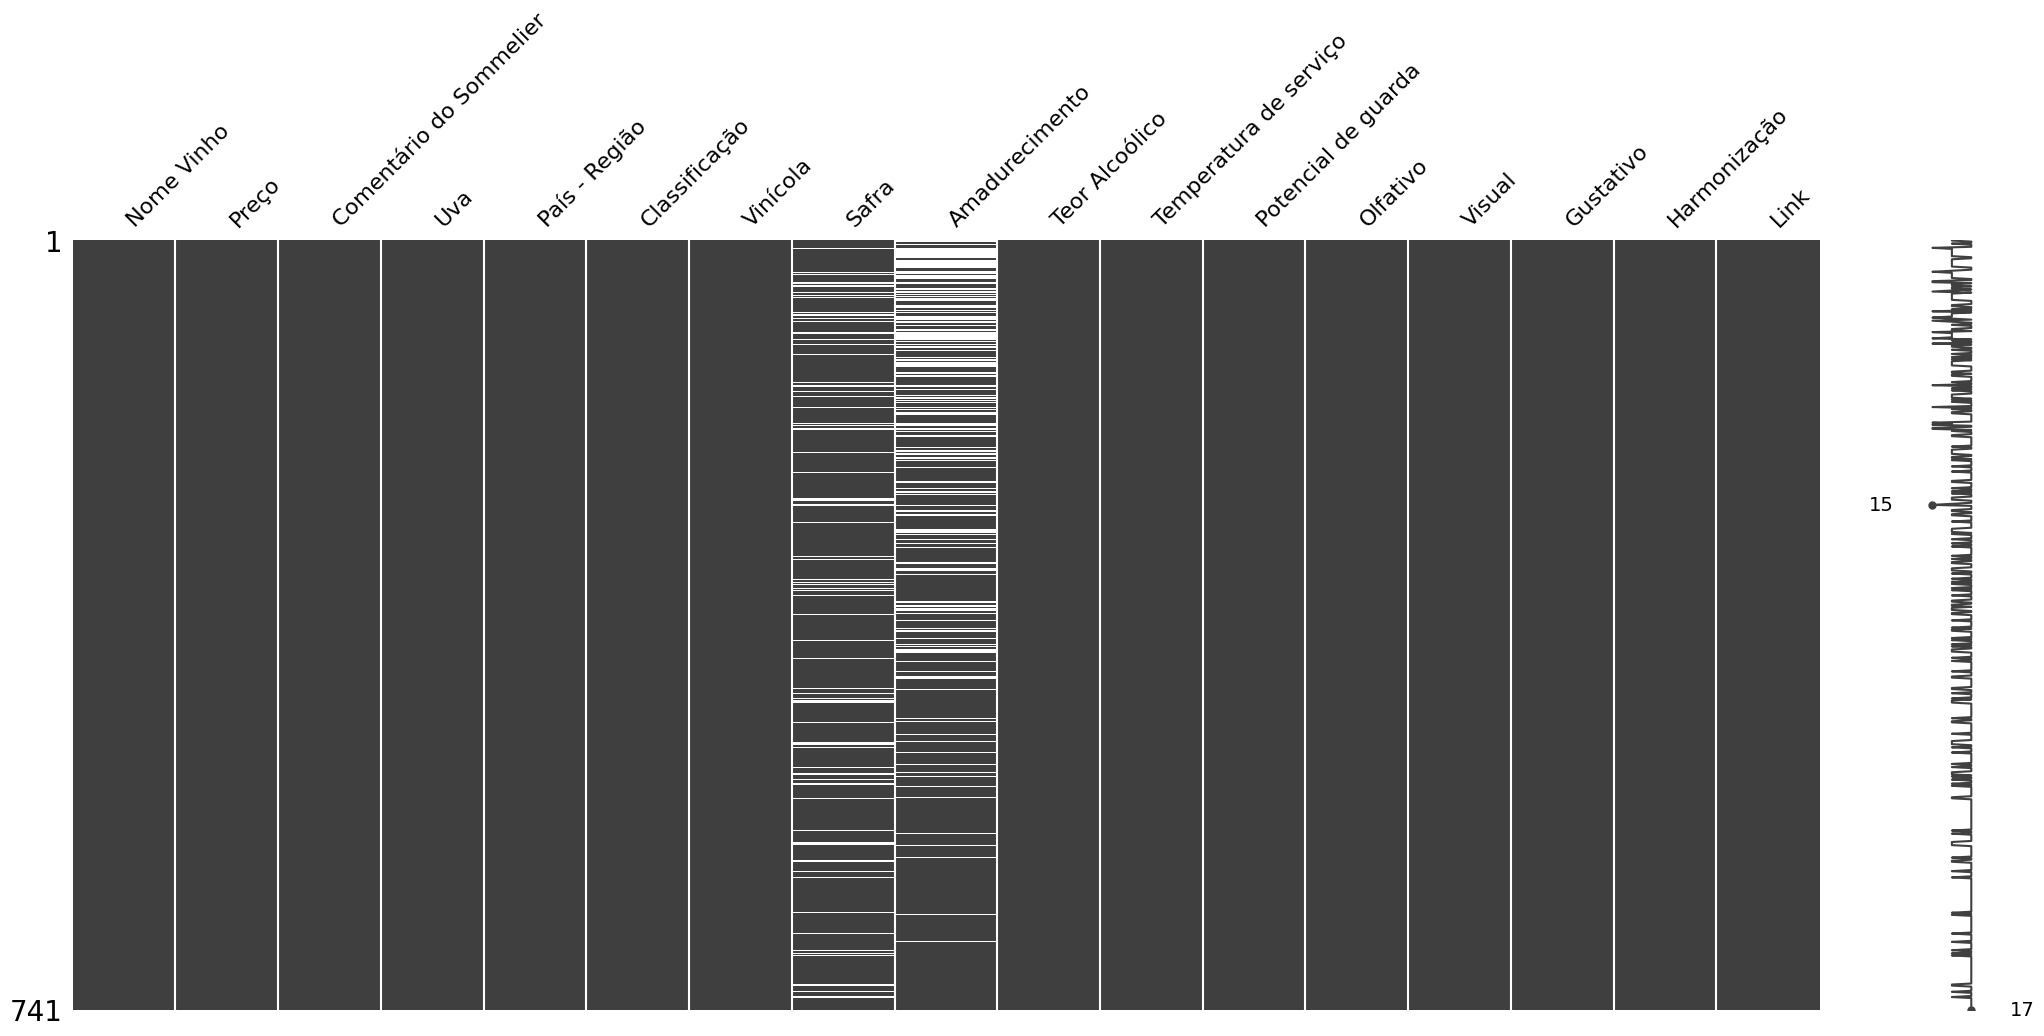

In [1045]:
msno.matrix(wine)

In [1046]:
# Depois de analises, aparentemente Safra e Amadurecimento não tem uma falta de preenchimento correlacionada.
#Alguns vinhos aparentam não ter realmente info de safra: Porto - Champagne - Frisante posteriormente usar isso como feature

wine.isnull().sum()

Nome Vinho                   0
Preço                        0
Comentário do Sommelier      0
Uva                          0
País - Região                0
Classificação                0
Vinícola                     0
Safra                       81
Amadurecimento             164
Teor Alcoólico               0
Temperatura de serviço       0
Potencial de guarda          0
Olfativo                     0
Visual                       0
Gustativo                    0
Harmonização                 0
Link                         0
dtype: int64

## Nome de Colunas e atributos


In [1047]:
wine[['País','Região']] = wine['País - Região'].str.split('-',n=1,expand=True)

In [1048]:
wine['Teor Alcoólico'] = wine['Teor Alcoólico'].str.replace('%|ABV','')

C:\Users\rodri\AppData\Local\Temp\ipykernel_20732\1584313445.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  wine['Teor Alcoólico'] = wine['Teor Alcoólico'].str.replace('%|ABV','')


In [1049]:
wine['Temperatura de serviço'] = wine['Temperatura de serviço'].str.replace(' °C','')

In [1050]:
wine['Potencial de guarda'] = wine['Potencial de guarda'].str.replace('anos','')

In [1051]:
wine.columns

Index(['Nome Vinho', 'Preço', 'Comentário do Sommelier', 'Uva',
       'País - Região', 'Classificação', 'Vinícola', 'Safra', 'Amadurecimento',
       'Teor Alcoólico', 'Temperatura de serviço', 'Potencial de guarda',
       'Olfativo', 'Visual', 'Gustativo', 'Harmonização', 'Link', 'País',
       'Região'],
      dtype='object')

In [1052]:
wine = wine[['Nome Vinho', 'Preço', 'Comentário do Sommelier', 'Uva',
       'País','Região', 'Classificação', 'Vinícola', 'Safra', 'Amadurecimento',
       'Teor Alcoólico', 'Temperatura de serviço', 'Potencial de guarda',
       'Olfativo', 'Visual', 'Gustativo', 'Harmonização', 'Link']]

In [1053]:
wine.columns = wine.columns.str.lower()
wine.columns = wine.columns.str.replace('nome','')
wine.columns = wine.columns.str.strip()
wine.columns = wine.columns.str.replace(' ','_')

In [1054]:
wine

,vinho,preço,comentário_do_sommelier,uva,país,região,classificação,vinícola,safra,amadurecimento,teor_alcoólico,temperatura_de_serviço,potencial_de_guarda,olfativo,visual,gustativo,harmonização,link
0,Arya Tinto 2021 Lata 269 mL,23.41,O Arya acaba de vez com qualquer preconceito q...,"Merlot, Pinot Noir, Cabernet Franc e Cabernet ...",Brasil,Serra Gaúcha,Seco,Arya Wines,2021.0,NaN,12.50,15,3,"Frutado, sobretudo frutas vermelhas, ameixas e...",Rubi,"Corpo leve para médio, frutado, com frescor e ...","Embutidos, massas ao molho vermelho, risotos d...",https://www.wine.com.br/vinhos/arya-tinto-2021...
1,Arya Rosé 2021 Lata 269 mL,23.41,Um rosé produzido com uvas da Serra Gaúcha e d...,"Pinot Noir, Merlot, Trebbiano",Brasil,Serra Gaúcha,Seco,Arya Wines,2021.0,NaN,11.00,8,3,"Frutas vermelhas, especialmente morangos madur...",Rosa cereja pálido,"Fresco e delicado, suculento e frutado, cremos...","Versátil, funcionando com aperitivos e entrada...",https://www.wine.com.br/vinhos/arya-rose-2021-...
2,Paine Cabernet Sauvignon 2021 375 mL,32.82,"Essencialmente frutado e leve, este vinho foi ...",Cabernet Sauvignon,Chile,Valle Central,Seco,VyF Wines,2021.0,Breve passagem em tanques de aço inox,13.00,16,3,"Aromas de frutas negras e vermelhas, pimenta-d...",Rubi,"Um vinho jovem, leve, frutado com sutis notas ...","Opte por pratos mais leves, carnes magras, mol...",https://www.wine.com.br/vinhos/paine-cabernet-...
4,Viña Carrasco D.O. Valle Central Rosé 2021,38.71,A Cabernet Sauvignon e Merlot são as uvas pres...,"Cabernet Sauvignon, Merlot",Chile,Valle Central,Seco,Luis Felipe Edwards,2021.0,Em tanques de aço inox,12.00,9,3,"Intensos aromas de frutas vermelhas frescas, m...",Rosa-claro,"Jovem, leve, frutado, acidez agradável e refre...","Espaguete com camarão, risoto de palmito com r...",https://www.wine.com.br/vinhos/vina-carrasco-d...
5,Pueblo del Sol Tannat Rosé 2021,46.94,Um rosé do Uruguai elaborado com a emblemática...,Tannat,Uruguai,Canelones,Seco,Pueblo del Sol,2021.0,NaN,12.00,9,3,"Frutas vermelhas fresca, morango e cereja",Rosa claro,"Um vinho jovem, leve, frutado, macio, com acid...","Salada de frutos do mar, frango com vinagrete ...",https://www.wine.com.br/vinhos/pueblo-del-sol-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
829,Château de Beaucastel Hommage à Jacques Perrin...,9351.76,"Produzido apenas em safras excepcionais, o Châ...","Mourvèdre (60.00%), Syrah (20.00%), Grenache (...",França,Châteauneuf-du-Pape,Seco,Château de Beaucastel,2010.0,Em barricas de carvalho.,15.00,16,40,"Mirtilo, amora, alcaçuz, framboesa, anis, erva...",Rubi com reflexos violáceos,"Denso, exuberante, estruturado, concentrado, b...","Ravioli de cordeiro, ojo de bife com polenta c...",https://www.wine.com.br/vinhos/chateau-de-beau...
830,Château Palmer 2005,16881.18,"O primeiro vinho do Château Palmer, que produz...","Petit Verdot (7.00%), Cabernet Sauvignon (53.0...",França,Margaux,Seco,Château Palmer,2005.0,Em barricas de carvalho.,14.00,16,50,"Cereja negra, mirtilo, cassis, ameixa, alcaçuz...",Rubi intenso,"Concentrado, elegante, potente, taninos presen...","Picanha de cordeiro, cogumelos recheados com b...",https://www.wine.com.br/vinhos/chateau-palmer-...
832,Chateau Latour 2011,19822.35,"O grande vinho do Château Latour, nome que já ...","Cabernet Sauvignon (84.50%), Merlot (15.00%), ...",França,Pauillac,Seco,Château Latour,2011.0,18 meses em barricas de carvalho.,13.00,16,25,"Frutas maduras, especiarias, tabaco, floral",Rubi intenso,"Muito complexo, corpo de médio para encorpado,...","Paleta de cordeiro, bife ancho, cogumelos rech...",https://www.wine.com.br/vinhos/chateau-latour-...
833,Château Margaux 2014,21469.41,Esse pontuado exemplar é um Premier Grand Cru ...,"Cabernet Sauvignon (90.00%), Merlot (5.00%), C...",França,Margaux,Seco,Château Margaux,2014.0,24 meses em barricas de carvalho.,13.00,16,23,"Ameixa, figo em compota, groselha madura, anis...",Rubi profundo,"Complexo, encorpado, boa acidez, taninos

In [1055]:
wine.to_csv('wine.csv',index=False)

C:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\internals\blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


In [1056]:
wine.columns

Index(['vinho', 'preço', 'comentário_do_sommelier', 'uva', 'país', 'região',
       'classificação', 'vinícola', 'safra', 'amadurecimento',
       'teor_alcoólico', 'temperatura_de_serviço', 'potencial_de_guarda',
       'olfativo', 'visual', 'gustativo', 'harmonização', 'link'],
      dtype='object')

# Evino

In [1057]:
evino = pd.read_csv('..//data_collecting//evino_03012023.csv')

In [1058]:
evino.shape

(735, 44)

<AxesSubplot: >

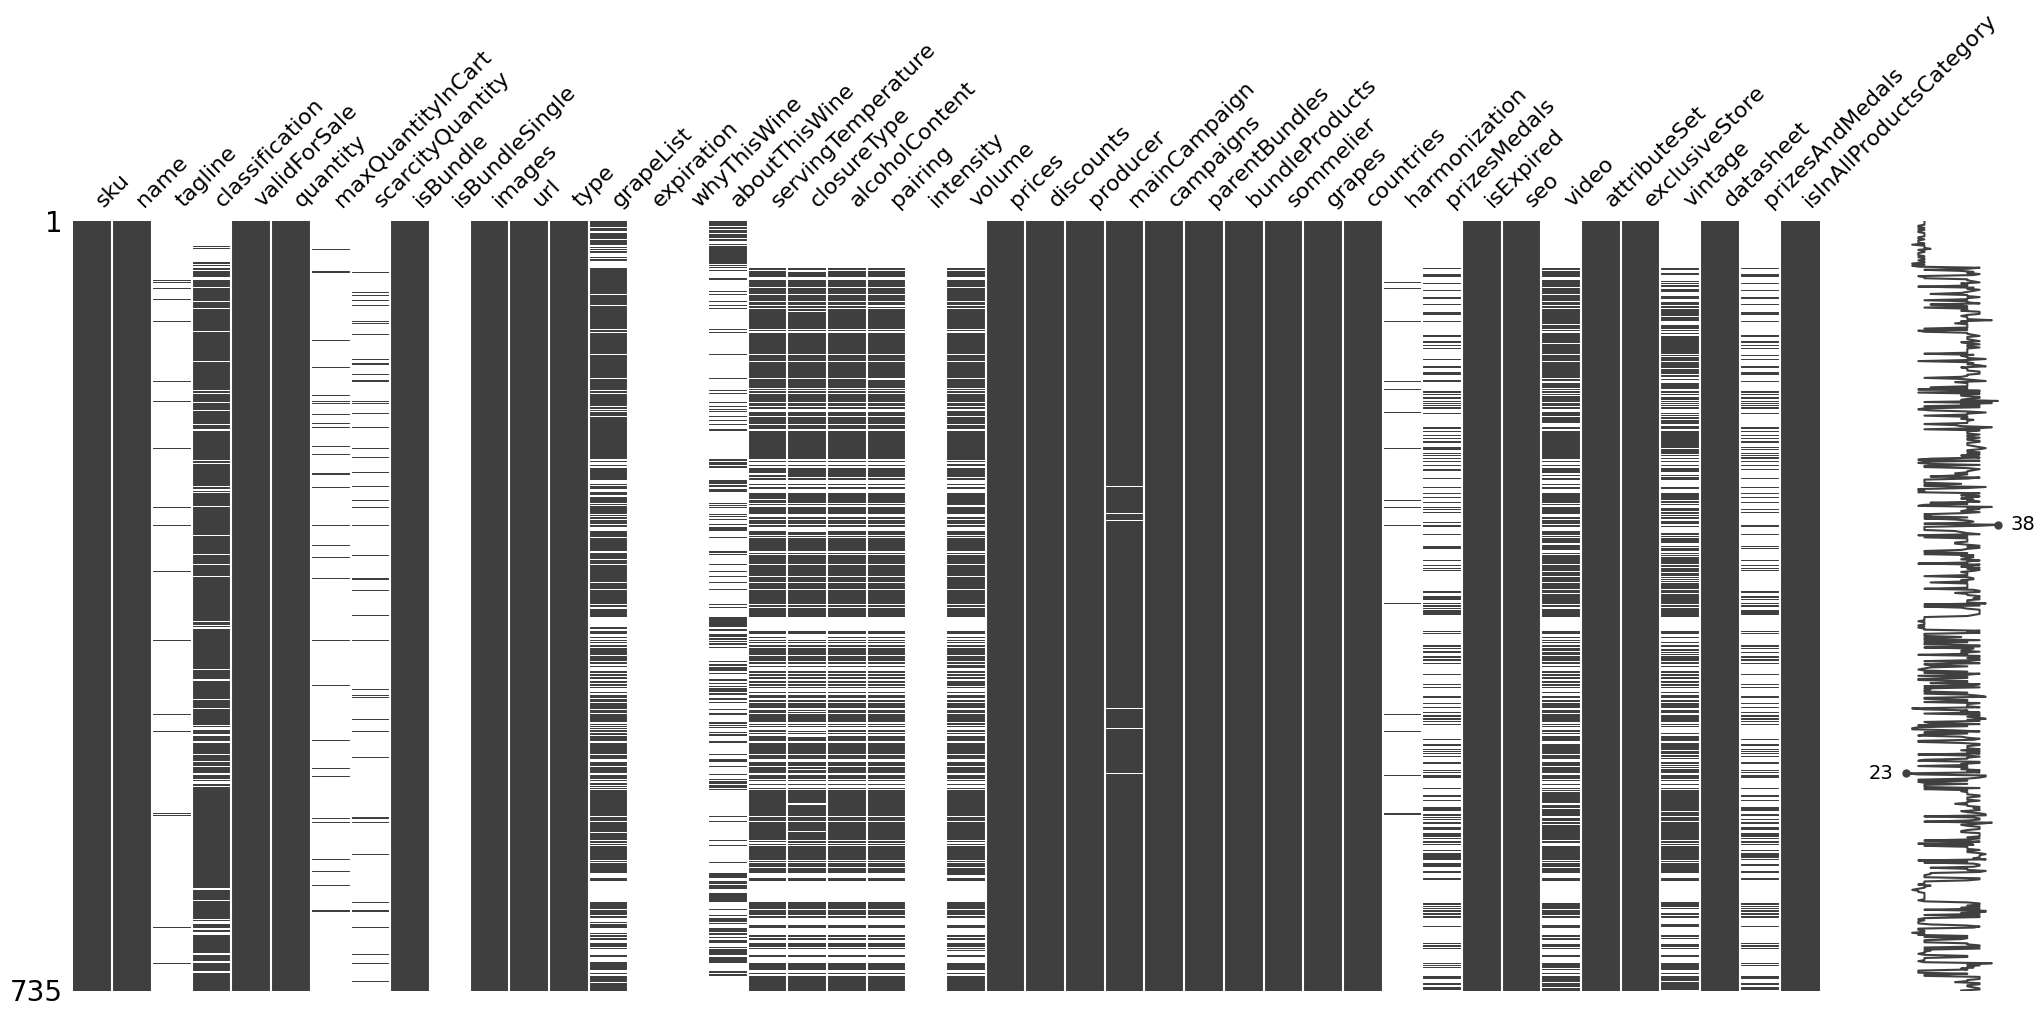

In [1059]:
msno.matrix(evino)

In [1060]:
# Excluindo tudo que é coluna em branco

evino.dropna(how='all',axis=1,inplace=True)

# Filtro de classificadores apenas produtos: Wine

evino = evino.loc[evino.classification=='Wine']

# Filtrando apenas vinhos individuais e não kit

evino = evino[~(evino.name.str.contains('Kit|kit'))]

# Dropando colunas irrelevantes e sem informação

evino.drop(labels=['sku','tagline', 'quantity',
       'maxQuantityInCart', 'scarcityQuantity', 'isBundle','classification','isInAllProductsCategory','prizesAndMedals','exclusiveStore','attributeSet','video','isExpired','prizesMedals','mainCampaign',
        'campaigns','bundleProducts','seo','parentBundles','harmonization'],axis=1,inplace=True)

In [1061]:
# Extraindo informações de colunas como json e criando novas colunas

# Imagem

evino['images'] = evino['images'].apply(lambda x: ast.literal_eval(x)['large'])

# Producer

evino['vinícola'] = evino['producer'].apply(lambda x: ast.literal_eval(x)['name'])
evino['região'] = evino['producer'].apply(lambda x: ast.literal_eval(x)['region'])
evino['país'] = evino['producer'].apply(lambda x: ast.literal_eval(x)['country'])

#Sommelier

evino['comentário_do_sommelier'] = evino['sommelier'].apply(lambda x: ast.literal_eval(x)['commentary'])
evino['visual'] = evino['sommelier'].apply(lambda x: ast.literal_eval(x)['color'])
evino['gustativo'] = evino['sommelier'].apply(lambda x: ast.literal_eval(x)['mouth'])
evino['olfativo'] = evino['sommelier'].apply(lambda x: ast.literal_eval(x)['nose'])
evino['ano_de_guarda'] = evino['sommelier'].apply(lambda x: ast.literal_eval(x)['keepUntil'])
evino['amadurecimento'] = evino['sommelier'].apply(lambda x: ast.literal_eval(x)['maturing'])

# Ajustando url 

evino['url'] = evino['url'].apply(lambda x: 'https://www.evino.com.br/product/'+str(x))

# Preço 

evino['preço'] = evino['prices'].apply((lambda x: ast.literal_eval(x)['sale']/100))

# Uvas 

evino['uva'] = evino['grapes'].apply(lambda x: ' ,'.join([dic['name'] for dic in ast.literal_eval(x)]))

# Cálculo de pontêncial de guarda 

evino['potencial_de_guarda'] = evino['ano_de_guarda']-evino['vintage']

evino['potencial_de_guarda'] = np.where(evino['potencial_de_guarda']>100,np.nan,evino['potencial_de_guarda'])

In [1062]:
evino.isnull().sum()

name                         0
validForSale                 0
images                       0
url                          0
type                         0
grapeList                    5
aboutThisWine              482
servingTemperature           8
closureType                 15
alcoholContent               5
pairing                      7
volume                       6
prices                       0
discounts                    0
producer                     0
sommelier                    0
grapes                       0
countries                    0
vintage                     81
datasheet                    0
vinícola                     0
região                      13
país                         0
comentário_do_sommelier      5
visual                       7
gustativo                    7
olfativo                     7
ano_de_guarda               60
amadurecimento             251
preço                        0
uva                          0
potencial_de_guarda        142
dtype: i

In [1063]:
evino.shape

(487, 32)

In [1064]:
# Retirando dados inuteis

evino.drop(columns=['aboutThisWine','ano_de_guarda','countries','discounts','valisuper_adegaorSale','grapeList','prices','producer','grapes','sommelier'],inplace=True)


KeyError: "['valisuper_adegaorSale'] not found in axis"

In [ ]:
evino.isnull().sum()

In [ ]:
# Dados que sem eles comprometemos a recomendação

evino.dropna(subset=['alcoholContent', 'servingTemperature', 'olfativo', 'visual', 'gustativo', 'pairing', 'url','região'],inplace=True)

In [ ]:
rename = dict(
{'name': 'vinho',
 'closureType': 'rolha',
 'type': 'classificação',
 'vintage': 'safra',
 'alcoholContent': 'teor_alcoólico',
 'servingTemperature': 'temperatura_de_serviço',
 'pairing': 'harmonização',
 'url': 'link'}
)

In [ ]:
evino.rename(columns=rename,inplace=True)

In [ ]:
evino.isnull().sum()

In [ ]:
evino

In [ ]:
# Tratando colunas com valores e removendo string 

evino.teor_alcoólico = evino.teor_alcoólico.str.replace('%','')
evino.teor_alcoólico = evino.teor_alcoólico.str.replace(',','.')

evino.temperatura_de_serviço = evino.temperatura_de_serviço.str.replace('°C|ºC','')

evino.volume = evino.volume.str.lower()
evino.volume = evino.volume.str.strip()
evino.volume = evino.volume.str.replace('ml','')

In [ ]:
evino.isnull().sum()

In [ ]:
evino.to_csv('evino.csv',index=False)

# Pão de Açucar Adega

In [111]:
df = pd.read_csv('..//data_collecting//pao_acucar_16012023.csv')

In [112]:
df = df[['name','price','url','images']]

In [113]:
df['id'] = df['url'].apply(lambda x: x.split('/')[-1])

In [114]:
df.images = df.images.apply(lambda x: ast.literal_eval(x)['default'])

In [115]:
df

,name,price,url,images,id
0,Vinho Chileno Tinto TRES MEDALLAS Cabernet Sau...,42.99,https://www.paodeacucar.com/produto/329010,www.paodeacucar.com//img/uploads/1/850/2231985...,329010
1,Vinho Argentino Tinto MARQUES DE LA COLINA Gar...,19.99,https://www.paodeacucar.com/produto/323858,www.paodeacucar.com//img/uploads/1/633/619633x...,323858
2,Vinho Chileno Tinto Meio Seco Reservado Santa ...,44.99,https://www.paodeacucar.com/produto/96210,www.paodeacucar.com//img/uploads/1/485/4041485...,96210
3,Vinho Argentino Tinto PAULA Malbec Garrafa 750ml,79.99,https://www.paodeacucar.com/produto/336102,www.paodeacucar.com//img/uploads/1/192/2231719...,336102
4,Vinho Chileno Tinto 120 RESERVA ESPECIAL Caber...,44.99,https://www.paodeacucar.com/produto/118250,www.paodeacucar.com//img/uploads/1/512/2232051...,118250
...,...,...,...,...,...
1047,Vinho Sidra sem Álcool de Morango CERESER Garr...,10.99,https://www.paodeacucar.com/produto/91200,www.paodeacucar.com//img/uploads/1/536/500536x...,91200
1048,Vinho Filtrado de Pêssego CERESER Garrafa 660ml,15.99,https://www.paodeacucar.com/produto/78680,www.paodeacucar.com//img/uploads/1/526/500526x...,78680
1049,Vinho Espumante Nacional CLUB DES SOMMELIERS M...,39.99,https://www.paodeacucar.com/produto/327866,www.paodeacucar.com//img/uploads/1/184/1300718...,327866
1050,Champagne Francês Branco Brut Veuve Clicquot P...,499.99,https://www.paodeacucar.com/produto/137044,www.paodeacucar.com//img/uploads/1/221/2383322...,137044


In [116]:
df2 = pd.read_csv('..//data_collecting//pao_acucar_17012023.csv')

In [117]:
df2.loc[df2.id==431734]

,id,Descrição,Temperatura,Características Gustativas,Características Olfativas,Características Visuais,Harmonização,Tipo,Produtor,País de Origem,Uva,Região,Teor Alcoólico,Volume,Link
1024,431734,NaN,NaN,NaN,NaN,NaN,NaN,Espumante,NaN,França,NaN,NaN,NaN,750ml,https://www.paodeacucar.com/adega/produto/431734


In [118]:
df2.columns = df2.columns.str.lower()
df2.columns = df2.columns.str.strip()
df2.columns = df2.columns.str.replace(' ','_')

<AxesSubplot: >

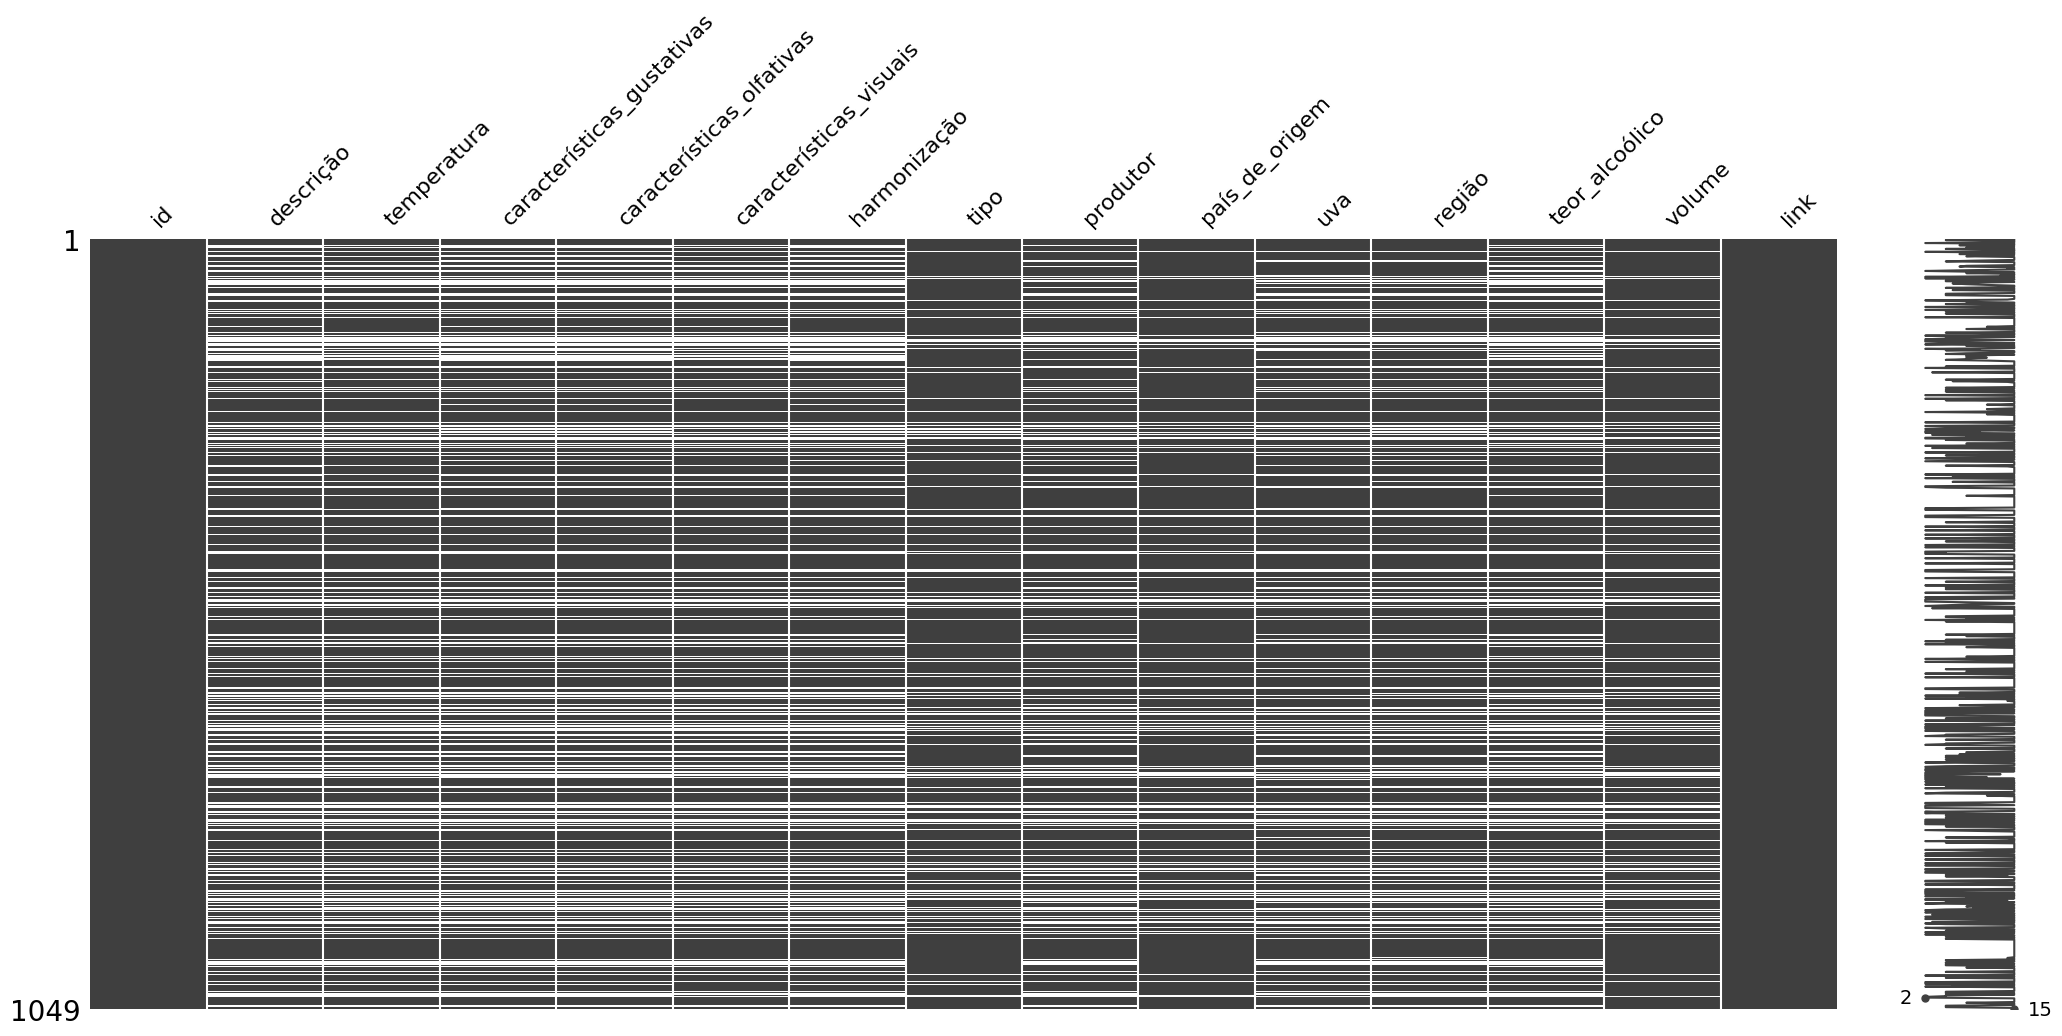

In [119]:
msno.matrix(df2)

In [120]:
df.id = df.id.astype('int64')

In [121]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          1049 non-null   int64 
 1   descrição                   729 non-null    object
 2   temperatura                 740 non-null    object
 3   características_gustativas  723 non-null    object
 4   características_olfativas   723 non-null    object
 5   características_visuais     741 non-null    object
 6   harmonização                724 non-null    object
 7   tipo                        885 non-null    object
 8   produtor                    783 non-null    object
 9   país_de_origem              886 non-null    object
 10  uva                         789 non-null    object
 11  região                      783 non-null    object
 12  teor_alcoólico              740 non-null    object
 13  volume                      889 non-null    obje

In [122]:
df2 = df2.dropna()

In [123]:
df_t = df2.merge(df,how='left',on='id')

In [124]:
df_t.loc[df_t['name'].str.contains('Periquita',na=False)]

,id,descrição,temperatura,características_gustativas,características_olfativas,características_visuais,harmonização,tipo,produtor,país_de_origem,uva,região,teor_alcoólico,volume,link,name,price,url,images
66,88272,Vermelho rubi intenso. Aromas que remetem à fr...,14°C a 16°C,"Macio, equilibrado e boa acidez","Cassis, mirtilo, baunilha e café",Vermelho rubi intenso,"Carnes vermelhas grelhadas, carnes de caça, ma...",Tinto,José Maria da Fonseca,Portugal,"56% Castelão, 24% Touriga Nacional e 20% Touri...",Península De Setúbal,13%,750ml,https://www.paodeacucar.com/adega/produto/88272,Vinho Português Tinto Meio Seco Reserva Periqu...,89.99,https://www.paodeacucar.com/produto/88272,www.paodeacucar.com//img/uploads/1/251/2121125...
223,431557,Aromas que remetem à frutas vermelhas e negras...,14°C a 16°C,"Macio, equilibrado, boa acidez, persistente","Frutas vermelhas e negras, toques florais, bau...",Vermelho rubi intenso,"Carnes vermelhas grelhadas, carnes de caça, ma...",Tinto,José Maria da Fonseca,Portugal,"56% Castelão, 22% Touriga Nacional e 22% Touri...",Península De Setúbal,13%,"1,5 L",https://www.paodeacucar.com/adega/produto/431557,Vinho Português Tinto Periquita Reserva Garraf...,249.99,https://www.paodeacucar.com/produto/431557,www.paodeacucar.com//img/uploads/1/680/577680x...
232,431541,"Vermelho rubi com aromas de frutas vermelhas, ...",13°C a 15°C,Frutado e macio,"Frutas vermelhas, flores e um delicado toque d...",Vermelho rubi,"Aperitivo, bolinho de bacalhau, aves, pratos v...",Tinto,José Maria da Fonseca,Portugal,"48% Castelão, 37% Trincadeira e 15% Aragonês",Península De Setúbal,13%,"1,5 L",https://www.paodeacucar.com/adega/produto/431541,"Vinho Português Tinto Periquita Garrafa 1,5 L",149.99,https://www.paodeacucar.com/produto/431541,www.paodeacucar.com//img/uploads/1/432/586432x...
642,438701,O Periquita Rosé é elaborado com uvas típicas ...,10°C a 12°C,"Frutado, macio, aveludado, boa acidez e equili...","Frutas vermelhas, morango, groselha, amora e t...",Cor salmão com reflexos vermelhos.,"Aperitivo, saladas, pastas, mariscos, frutos d...",Rosé,José Maria da Fonseca,Portugal,"48% Touriga Nacional, 35% Castelão e 17% Aragonês",Península de Setúbal,13%,750ml,https://www.paodeacucar.com/adega/produto/438701,Vinho Português Rosé Periquita 750ml,89.99,https://www.paodeacucar.com/produto/438701,www.paodeacucar.com//img/uploads/1/727/4042727...


In [125]:
df_t['temperatura'] = df_t['temperatura'].str.replace('a|°C','')
df_t['temperatura'] = df_t['temperatura'].str.replace('  ','-')
df_t['temperatura'] 

C:\Users\rodri\AppData\Local\Temp\ipykernel_23196\3101214573.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_t['temperatura'] = df_t['temperatura'].str.replace('a|°C','')


0      16-18
1      16-18
2      16-18
3      16-18
4      16-17
       ...  
763      6-8
764    04-06
765        6
766    08-10
767       06
Name: temperatura, Length: 768, dtype: object

In [126]:
df_t['teor_alcoólico'] = df_t['teor_alcoólico'].str.replace('%','')
df_t['teor_alcoólico'] = df_t['teor_alcoólico'].str.replace(',','.')
df_t['teor_alcoólico'].str.replace('%','')

0      12.5
1      12.5
2      12.5
3      12.5
4      13.5
       ... 
763    11.5
764       8
765       8
766      12
767      12
Name: teor_alcoólico, Length: 768, dtype: object

In [127]:
def l_to_ml(x):
    
    'litros para ml'
    
    x = float(x)
    
    div = x/100
    
    if div < 1:
        
        return x*1000
    
    else:
        
        return x

In [128]:
df_t['volume'] = df_t['volume'].str.lower()
df_t['volume'] = df_t['volume'].str.strip()
df_t['volume'] = df_t['volume'].str.replace('ml|L| l|l','')
df_t['volume'] = df_t['volume'].str.replace(',','.')
df_t['volume'] = df_t['volume'].apply(l_to_ml)
df_t['volume']


C:\Users\rodri\AppData\Local\Temp\ipykernel_23196\1265524681.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_t['volume'] = df_t['volume'].str.replace('ml|L| l|l','')


0      750.0
1      750.0
2      750.0
3      750.0
4      750.0
       ...  
763    750.0
764    750.0
765    750.0
766    750.0
767    750.0
Name: volume, Length: 768, dtype: float64

In [129]:
df_t.columns

Index(['id', 'descrição', 'temperatura', 'características_gustativas',
       'características_olfativas', 'características_visuais', 'harmonização',
       'tipo', 'produtor', 'país_de_origem', 'uva', 'região', 'teor_alcoólico',
       'volume', 'link', 'name', 'price', 'url', 'images'],
      dtype='object')

In [138]:
df_t.rename(columns={'características_gustativas':'gustativo',
                     'características_olfativas':'olfativo',
                     'características_visuais':'visual',
                     'name':'vinho',
                     'descrição':'comentário_do_sommelier',
                     'temperatura':'temperatura_de_serviço',
                     'país_de_origem':'país',
                     'tipo':'classificação',
                     'produtor':'vinícola',
                     'price':'preço',
                     },inplace=True)

In [139]:
df_t = df_t[[ 'link', 'vinho', 'preço', 'comentário_do_sommelier', 'temperatura_de_serviço', 'gustativo',
       'olfativo', 'visual', 'harmonização', 'classificação', 'vinícola', 'país', 'uva',
       'região', 'teor_alcoólico', 'volume', 
       'images']]

In [140]:
df_t.to_csv('pao_acucar_adega.csv',index=False)